<a href="https://colab.research.google.com/github/meltemtugran/courses-notes/blob/main/%C4%B0%C5%9E_UYGULAMALARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FİYAT STRATEJİSİ KARAR DESTEK SİSTEMİ-GÜVEN ARALIKLARI
problem: ceo fiyat belirleme kousunda bilimsel bir dayana ve esneklik istiyor
dety:satıcı,alıcı,ürün var,alıcılara ne kadar fiyat verirsiniz anketi yapılıyor.optimum fiyat bulunmak isteniyor.


In [ ]:
import numpy as np
fiyatlar=np.random.randint(10,110,1000)

In [ ]:
fiyatlar.mean()

58.249

In [ ]:
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(56.434611942336325, 60.06338805766368)

#REKLAM HARCAMASI OPTİMİZAZONU-BİNOM DAĞILIMI
problem:çeşitli mecrlarda reklamlar veriliyor.reklamlrın tıklanama ve geri dönüşüm oranları optimize ediliyor.buna yönelik belirli bir mecrada çeşitli seneryolara göre tıklanma olasıkları hesaplnmaka isteniyor.

soru: reklamı 100 kişi gördüğünde 1,5,10 tıklanma olasılığı nedir?

In [ ]:
from scipy.stats import binom

In [ ]:
p=0.01
n=100
rv=binom(n,p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


#İLAN GİRİŞİ HATA OLASILIKLARI HESAPLANMASI-POİSSON DAĞILIMI

problem:bir yıl boyunca ölçüm yapılıyor.poisson dağılımı var.lamda 0.1.

hiç hata olmamsı , 3 hata olması ve 5 hata olma olasılığı nedir?

In [ ]:
from scipy.stats import poisson
lamda_=0.1
rv=poisson(mu=lamda_)
print(rv.pmf(k=0))
print(rv.pmf(k=3))
print(rv.pmf(k=5))


0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


#ÜRÜN SATIŞ OLASILIKLARININ HESAPLANMASI-NORMAL DAĞILIM

AYLIK ORTALAMA SATIŞ 80K,STANDART SAPMA 5K,90K DAN FAZLA SATIŞ YAPMA OLASILIĞI KAÇ

In [ ]:
from scipy.stats import norm
#90 dan fazla olması
1-norm.cdf(90,80,5)

0.02275013194817921

In [ ]:
#70 dan fazla olması
1-norm.cdf(70,80,5)


0.9772498680518208

In [ ]:
#73 dan az olması
norm.cdf(73,80,5)

0.08075665923377107

In [ ]:
#85 ile 90 arasında olması
norm.cdf(90,80,5) - norm.cdf(85,80,5)

0.13590512198327787

#ÜRÜN SATIN ALMA ADIM OPTİMİZASYONU

SEPETE ÜRÜN EKLEDİKTEN SONRA ÖDEME EKRANINDA 5 ADIM VAR.HER ADIM 20 SN. 4. ADIM SORGULANIYOR.TEST ETMEK İÇİN 100 ÖRNEK ALINIYOR.ÖRNEK SS 5 SN. ÖRNEK ORTALAMA 19

ADIM1:HİPOTEZLERİN KURULMASI VE YÇNLERİN BELİRLENMESİ

ADIM2:ANLAMLILIK DÜZEYİNİNİ BELİRLENMESİ VE TABLO DEĞERLERİNİN BELİRLENMESİ

ADIM3:TST İSTATİSTİĞİNİN BELİRLENMESİ VE HESAPLANMASI

ADIM4:ZTABLO VE ZHESAP KARŞILAŞTIRILMASI  ZH<ZT İSE H0 REDDEDİLİR

ADIM5: YORUM:

#WEB SİTESİNDE GEÇİRİLEN SÜRENİN TEST- TEK ÖRNEKLEM T TESTİ
problem:web sitede geçirilen ortalama süre gerçekten 170 saniye mi?

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
olcumler= np.array([14,15,585,54,88,5,282,785,426,536,48,59,22,45,745,865,123,256,147,369,52,123,45,65,32,123,89,996,456,489,421,476,11,114,115,112,156,123,159,164,14,74,56,357,25,357,369,321,258,654,123,114,225,12,147,158,114])

In [ ]:
olcumler[0:10]

array([ 14,  15, 585,  54,  88,   5, 282, 785, 426, 536])

In [ ]:
import scipy.stats as stats

In [ ]:
stats.describe(olcumler)

DescribeResult(nobs=57, minmax=(5, 996), mean=231.01754385964912, variance=56850.767543859656, skewness=1.4133141550259458, kurtosis=1.3274775268413004)

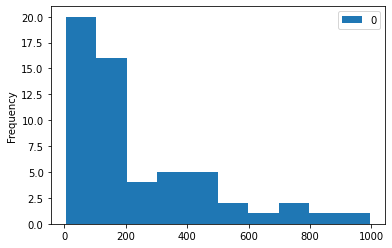

In [ ]:
#varsayımlar
#normallik varsayımı
#histogram grafiği:
pd.DataFrame(olcumler).plot.hist();

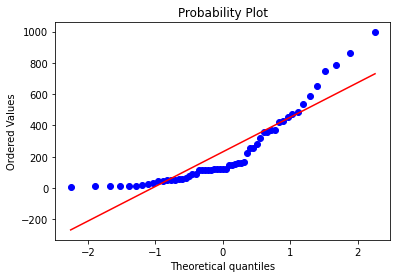

In [ ]:
#qqplot grfaiği
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()


In [ ]:
#shapiro wilks testi
#h0: örnek dağılı ile teorik normla dağılım arsında anlamlılık yok
from scipy.stats import shapiro

In [ ]:
shapiro(olcumler)

(0.8219498991966248, 8.337145231962495e-07)

In [ ]:
#t örneklem testi uygulaması :
stats.ttest_1samp(olcumler,popmean=170)



Ttest_1sampResult(statistic=1.9320750114667218, pvalue=0.058415225985620024)

In [ ]:
#h0: sitede geçirilen süre 170
#h1: "   "     değildir.
#p-value değeri 0.05 den büyük olduğu için h0 değeri red edilir

#Nonparametrik tek örneklem testi:

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

In [ ]:
sign_test(olcumler,170)

(-7.5, 0.06273668035582843)

#DÖNÜŞÜM ORAN TESTİ
PROBLEM :reklam verilmiş.yazılım tarafından 0.125 dönüşüm oranı var.kontrol edilmek isteniyor.